<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-labraries-and-Data" data-toc-modified-id="Importing-labraries-and-Data-1">Importing labraries and Data</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-EDA" data-toc-modified-id="Exploratory-Data-Analysis-EDA-1.1">Exploratory Data Analysis EDA</a></span><ul class="toc-item"><li><span><a href="#Orders" data-toc-modified-id="Orders-1.1.1">Orders</a></span></li><li><span><a href="#Revenue" data-toc-modified-id="Revenue-1.1.2">Revenue</a></span></li><li><span><a href="#Customers-and-Items" data-toc-modified-id="Customers-and-Items-1.1.3">Customers and Items</a></span></li></ul></li><li><span><a href="#RFM-Segmentation" data-toc-modified-id="RFM-Segmentation-1.2">RFM Segmentation</a></span></li><li><span><a href="#Cohort-Analysis" data-toc-modified-id="Cohort-Analysis-1.3">Cohort Analysis</a></span></li><li><span><a href="#Market-Basket-Analysis" data-toc-modified-id="Market-Basket-Analysis-1.4">Market Basket Analysis</a></span></li><li><span><a href="#Customer-lifetime-value" data-toc-modified-id="Customer-lifetime-value-1.5">Customer lifetime value</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Basic-Frequency/Recency-analysis-using-the-BG/NBD-model" data-toc-modified-id="Basic-Frequency/Recency-analysis-using-the-BG/NBD-model-1.5.0.1">Basic Frequency/Recency analysis using the BG/NBD model</a></span></li><li><span><a href="#Frequency/Recency-Matrix" data-toc-modified-id="Frequency/Recency-Matrix-1.5.0.2">Frequency/Recency Matrix</a></span></li><li><span><a href="#probability-of-still-being-alive" data-toc-modified-id="probability-of-still-being-alive-1.5.0.3">probability of still being alive</a></span></li><li><span><a href="#Spliting-calibration-and-holdout-period" data-toc-modified-id="Spliting-calibration-and-holdout-period-1.5.0.4">Spliting calibration and holdout period</a></span></li><li><span><a href="#The-Gamma-Gamma-model" data-toc-modified-id="The-Gamma-Gamma-model-1.5.0.5">The Gamma-Gamma model</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Importing labraries and Data

In [25]:
# import libraries
# Data processing
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# BMA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# CLV
from lifetimes.utils import summary_data_from_transaction_data,calibration_and_holdout_data
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix, plot_period_transactions, plot_calibration_purchases_vs_holdout_purchases

ModuleNotFoundError: No module named 'plotly'

In [26]:
# import data (2009 -> 2011)
data0910 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data1011 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data = pd.concat([data0910,data1011])
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'online_retail_II.xlsx'

In [27]:
data.shape

NameError: name 'data' is not defined

In [28]:
data.info()

NameError: name 'data' is not defined

Nots that: There are Missing Data in Description and The Customer ID Columns , let's check that

In [29]:
#Check and delete Missing values
data.isnull().sum()

NameError: name 'data' is not defined

In [30]:
data.rename(columns={'Customer ID':'CustomerID'},inplace= True)
data = data.dropna(subset=['CustomerID'])

NameError: name 'data' is not defined

In [31]:
data.isnull().sum()

NameError: name 'data' is not defined

In [32]:
#Check and delete Duplicates
data.duplicated().sum()

NameError: name 'data' is not defined

In [33]:
data = data.drop_duplicates()

NameError: name 'data' is not defined

In [34]:
data.describe()

NameError: name 'data' is not defined

In [35]:
# delete rows with non positive quantity / price
data=data[(data['Quantity']>0) & (data['Price']>0)]
data.describe()

NameError: name 'data' is not defined

In [36]:
print('{:,} rows; {:,} columns'.format(data.shape[0], data.shape[1]))

NameError: name 'data' is not defined

In [37]:
print('Orders from {} to {}'.format(data['InvoiceDate'].min(),data['InvoiceDate'].max()))

NameError: name 'data' is not defined

In [38]:
data["total_price"] = data['Price']* data['Quantity']
data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["DayNb"] = data.InvoiceDate.dt.weekday
data["Weekday"] = data['InvoiceDate'].apply(lambda x: x.strftime('%A'))
data["Day"] = data.InvoiceDate.dt.day
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])

NameError: name 'data' is not defined

In [39]:
data.head(3)

NameError: name 'data' is not defined

<a id='EDA'></a>
## Exploratory Data Analysis EDA 

### Orders

In [40]:
orders = pd.DataFrame(data.groupby("Date").Invoice.count())
orders_w = pd.DataFrame(data.groupby("Date").Invoice.count().rolling(window=7, center=True).mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=orders.index, y=orders.Invoice,
                    mode='lines',
                    name='daily orders'))
fig.add_trace(go.Scatter(x=orders_w.index, y=orders_w.Invoice,
                    mode='lines',
                    name='7 days moving average'))
fig.update_layout(
    title="Daily Orders",
    xaxis_title="Date",
    yaxis_title="Orders",
    )
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

NameError: name 'data' is not defined

In [16]:
dataday = data.sort_values(by='DayNb', ascending=True).groupby(["DayNb"]).Invoice.count()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig = px.bar(x=weekdays, y=dataday)
fig.update_layout(
    title="Orders by Day",
    xaxis_title="Day of Week",
    yaxis_title="Orders",
    )
fig.show()

NameError: name 'data' is not defined

In [17]:
datamonth = data.sort_values(by=["Year", "Month"], ascending=True).groupby(["Year", "Month"]).Invoice.count().values
yearmonth = ["Dec-2009", "Jan-2010", "Feb-2010", "Mar-2010", "Apr-2010", "May-2010",
             "Jun-2010", "Jul-2010", "Aug-2010", "Sep-2010", "Oct-2010", "Nov-2010","Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]
fig = px.bar(x=yearmonth, y=datamonth)
fig.update_layout(
    title="Orders by month",
    xaxis_title="Month",
    yaxis_title="Orders",
    )
fig.show()

NameError: name 'data' is not defined

### Revenue

In [18]:
revenue = pd.DataFrame(data.groupby("Date").total_price.sum())
revenue_w = pd.DataFrame(data.groupby("Date").total_price.sum().rolling(window=7, center=True).mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=revenue.index, y=revenue.total_price,
                    mode='lines',
                    name='daily revenue'))
fig.add_trace(go.Scatter(x=revenue_w.index, y=revenue_w.total_price,
                    mode='lines',
                    name='7 days moving average'))
fig.update_layout(
    title="Daily Revenue",
    xaxis_title="Date",
    yaxis_title="Revenue",
    )
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

NameError: name 'pd' is not defined

In [19]:
dataday = data.sort_values(by='DayNb', ascending=True).groupby(["DayNb"]).total_price.sum()
fig = px.bar(x=weekdays, y=dataday)
fig.update_layout(
    title="Revenue by Day",
    xaxis_title="Day of Week",
    yaxis_title="Revenue",
    )
fig.show()

NameError: name 'data' is not defined

In [20]:
datamonth = data.sort_values(by=["Year", "Month"], ascending=True).groupby(["Year", "Month"]).total_price.sum()
fig = px.bar(x=yearmonth, y=datamonth)
fig.update_layout(
    title="Revenue by month",
    xaxis_title="Month",
    yaxis_title="Revenue",
    )
fig.show()

NameError: name 'data' is not defined

### Customers and Items

In [21]:
print("Total No. of Products, Transactions, Customers : ")
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['Invoice'].value_counts()),
               'customers': len(data['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

Total No. of Products, Transactions, Customers : 


NameError: name 'pd' is not defined

In [22]:
print('Total Number of Products: {} '.format(len(data['StockCode'].value_counts())))
print('Total Number of transactions: {} '.format(len(data['Invoice'].value_counts())))
print('Total Number of customers: {} '.format(len(data['CustomerID'].value_counts())))

NameError: name 'data' is not defined

###### Best Seller

In [23]:
top_items = data.groupby(by='Description', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10).sort_values(by='Quantity', ascending=True)
fig = px.bar(y= top_items.Description, x= top_items.Quantity, orientation ='h')
fig.update_layout(
    title="Best Seller : ",
    xaxis_title="Quantity",
    yaxis_title="Item",
    )
fig.show()

NameError: name 'data' is not defined

###### Top 10 cutomers

In [25]:
cutomers = data.groupby(by='CustomerID', as_index=False)['Invoice'].count().sort_values(by='Invoice', ascending=False)
money = data.groupby(by='CustomerID', as_index=False)['total_price'].sum()
top_customer =  pd.merge(cutomers, money, on='CustomerID')
top_customer['CustomerID'] = top_customer['CustomerID'].apply(str)
top_customer['Customer'] = 'Cusomer ID :' + top_customer['CustomerID'].astype(str)
df = top_customer.sort_values(by='total_price', ascending=False).head(10)
fig = px.bar(df, x= "Customer", y= "total_price" , color="Invoice")
fig.update_layout(
    title="Top Customer ordered by revenue : ",
    xaxis_title="Customer",
    yaxis_title="Total Money Spent",
    )
fig.show()

In [26]:
df = top_customer.sort_values(by='Invoice', ascending=False).head(10)
fig = px.bar(df, x= "Customer", y= "Invoice" , color="total_price")
fig.update_layout(
    title="Top Customer ordered by Orders : ",
    xaxis_title="Customer",
    yaxis_title="Total Orders",
    )
fig.show()

## RFM Segmentation

In [27]:
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [28]:
# Calculate RFM metrics
rfm = data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,'Invoice':'count','total_price': 'sum'})
rfm.head()

,InvoiceDate,Invoice,total_price
CustomerID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


In [29]:
#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','total_price':'Monetary'},inplace= True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


In [30]:
#Building RFM segments
r_labels =range(5,0,-1)
f_labels=range(1,6)
m_labels=range(1,6)
r_quartiles = pd.qcut(rfm['Recency'], q=5, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=5, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=5,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,34,77556.46,2,2,5,225,9.0
12347.0,2,222,4921.53,5,5,5,555,15.0
12348.0,75,51,2019.40,3,3,4,334,10.0
12349.0,19,175,4428.69,5,5,5,555,15.0
12350.0,310,17,334.40,2,2,2,222,6.0


In [31]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346.0,326,34,77556.46,2,2,5,225,9.0,hibernating
12347.0,2,222,4921.53,5,5,5,555,15.0,champions
12348.0,75,51,2019.40,3,3,4,334,10.0,need attention
12349.0,19,175,4428.69,5,5,5,555,15.0,champions
12350.0,310,17,334.40,2,2,2,222,6.0,hibernating


In [32]:
rfm.describe(include = 'all')

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
count,5878.000000,5878.000000,5878.000000,5878.0,5878.0,5878.0,5878,5878.000000,5878
unique,NaN,NaN,NaN,5.0,5.0,5.0,116,NaN,10
top,NaN,NaN,NaN,5.0,1.0,5.0,555,NaN,hibernating
freq,NaN,NaN,NaN,1188.0,1197.0,1176.0,424,NaN,1457
mean,201.331916,132.600374,2955.904095,NaN,NaN,NaN,NaN,8.994046,NaN
std,209.338707,342.190092,14440.852688,NaN,NaN,NaN,NaN,3.615537,NaN
min,1.000000,1.000000,2.950000,NaN,NaN,NaN,NaN,3.000000,NaN
25%,26.000000,20.000000,342.280000,NaN,NaN,NaN,NaN,6.000000,NaN
50%,96.000000,52.000000,867.740000,NaN,NaN,NaN,NaN,9.000000,NaN
75%,380.000000,138.000000,2248.305000,NaN,NaN,NaN,NaN,12.000000,NaN


In [33]:
rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

In [34]:
import plotly.figure_factory as ff
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Recency'])
fig.update_layout(
    title="Distribution of Recency : "
    )
fig.show()

In [35]:
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Frequency'])
fig.update_layout(
    title="Distribution of Frequency : "
    )
fig.show()

In [36]:
fig = ff.create_distplot([rfm_segmentation.Recency], group_labels=  ['Monetary Value'])
fig.update_layout(
    title="Distribution of Monetary Value : "
    )
fig.show()

In [37]:
rfm_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Segment'] = rfm_agg.index
rfm_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count,Segment
Segment,,,,,
about to sleep,109.7,18.4,685.2,435,about to sleep
at risk,395.3,72.1,1290.7,784,at risk
can't loose,346.3,311.7,4571.2,106,can't loose
champions,8.5,433.7,10677.3,821,champions
hibernating,450.9,16.1,512.9,1457,hibernating
loyal customers,65.2,225.4,4076.6,1143,loyal customers
need attention,108.1,54.5,1368.4,256,need attention
new customers,10.6,8.8,2880.6,78,new customers
potential loyalists,25.8,43.0,1166.8,671,potential loyalists


In [38]:
fig = px.treemap(rfm_agg, path=['Segment'], values='Count',
                  color='MonetaryMean',
                  #color_continuous_scale='RdBu',
                  )
fig.show()

In [39]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
Segment,,,
about to sleep,-0.46,-0.86,-0.77
at risk,0.96,-0.46,-0.56
can't loose,0.72,1.35,0.55
champions,-0.96,2.27,2.61
hibernating,1.24,-0.88,-0.83
loyal customers,-0.68,0.70,0.38
need attention,-0.46,-0.59,-0.54
new customers,-0.95,-0.93,-0.03
potential loyalists,-0.87,-0.68,-0.61


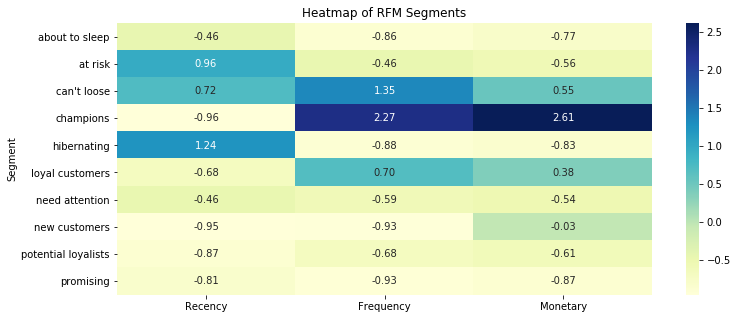

In [40]:
#Heatmap of RFM Segments
plt.figure(figsize=(12, 5))
plt.title('Heatmap of RFM Segments')
sns.heatmap(data=prop_rfm,annot = True,fmt='.2f',cmap="YlGnBu")
plt.show()

## Cohort Analysis

Cohort analysis is a subset of behavioral analytics that takes the data from a given data set (e.g. an EMRS, an e-commerce platform, web application, or online game) and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.Cohort analysis allows a company to “see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes.” By seeing these patterns of time, a company can adapt and tailor its service to those specific cohorts. While cohort analysis is sometimes associated with a cohort study, they are different and should not be viewed as one and the same. Cohort analysis is specifically the analysis of cohorts in regards to big data and business analytics, while in cohort study, data is broken down into similar groups.[wikipedia](https://en.wikipedia.org/wiki/Cohort_analysis)

In [41]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
grouping = data.groupby('CustomerID')['InvoiceMonth']
data['CohortMonth'] = grouping.transform('min')
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,total_price,Year,Quarter,Month,Week,DayNb,Weekday,Day,Date,InvoiceMonth,CohortMonth
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,2011,4,12,49,4,Friday,9,2011-12-09,2011-12-01,2011-08-01


In [42]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year = data['Year']
invoice_month = data['Month']
cohort_year,cohort_month,_ = get_month_int(data,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

data['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [43]:
#Count monthly active customers from each cohort
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')

Retention Rate Table

In [44]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 

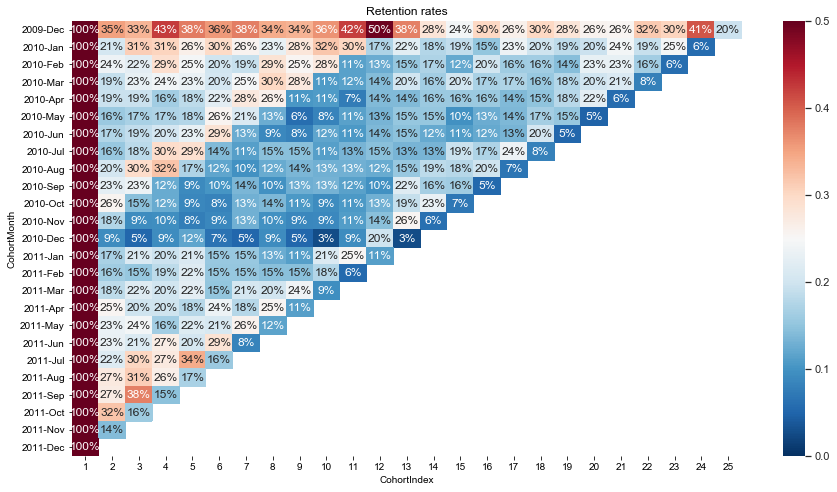

In [45]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.set()
ax = sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = .5,cmap="RdBu_r")
ax.set_yticklabels(retention.index.strftime('%Y-%b'))

plt.show()

## Market Basket Analysis

In [46]:
df_association = data[['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','Price', 'CustomerID',]]
df_association['Description'] = df_association['Description'].str.strip()
df_association = df_association[df_association.Quantity >0]

In [47]:
item_count = (df_association.
     groupby(by = ['Description'])['Invoice'].
     count().
     reset_index().
     rename(columns = {'Invoice': 'ItemCount'})
     [['Description', 'ItemCount']]
    )
item_count.head()

,Description,ItemCount
0,10 COLOUR SPACEBOY PEN,476
1,11 PC CERAMIC TEA SET POLKADOT,1
2,12 ASS ZINC CHRISTMAS DECORATIONS,48
3,12 COLOURED PARTY BALLOONS,260
4,12 DAISY PEGS IN WOOD BOX,182


In [48]:
threshold = 20
item_count = item_count.query('ItemCount >= @threshold')
item_count.head()

,Description,ItemCount
0,10 COLOUR SPACEBOY PEN,476
2,12 ASS ZINC CHRISTMAS DECORATIONS,48
3,12 COLOURED PARTY BALLOONS,260
4,12 DAISY PEGS IN WOOD BOX,182
5,12 EGG HOUSE PAINTED WOOD,143


In [49]:
combined = df_association.merge(item_count, left_on = 'Description', right_on = 'Description', how = 'inner')

In [50]:
basket = pd.pivot_table(data=combined,index='Invoice',columns='Description',
                        values='Quantity',aggfunc='sum',fill_value=0)

In [51]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,...,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Presence of the product is required
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

basket_sets = basket.applymap(convert_into_binary)

In [53]:
len(basket_sets)

36806

In [54]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)

In [55]:
#Call apriori function and pass minimum support here we are passing 1%. That means 1 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.0175, use_colnames=True)

In [56]:
frequent_itemsets

,support,itemsets
0,0.018584,(12 PENCILS SMALL TUBE SKULL)
1,0.017551,(3 HEARTS HANGING DECORATION RUSTIC)
2,0.022524,(3 STRIPEY MICE FELTCRAFT)
3,0.017769,(4 TRADITIONAL SPINNING TOPS)
4,0.036978,(6 RIBBONS RUSTIC CHARM)
...,...,...
252,0.031326,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI..."
253,0.022197,"(STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CE..."
254,0.018204,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR..."
255,0.018041,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI..."


In [57]:
#We have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head(-5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047954,0.042873,0.019997,0.416997,9.726234,0.017941,1.641719
1,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.042873,0.047954,0.019997,0.466413,9.726234,0.017941,1.784238
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.031082,0.028283,0.019073,0.613636,21.695965,0.018194,2.515031
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.028283,0.031082,0.019073,0.674352,21.695965,0.018194,2.975350
4,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.132804,0.072053,0.017606,0.132570,1.839878,0.008037,1.069765
5,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.072053,0.132804,0.017606,0.244344,1.839878,0.008037,1.147606
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.030104,0.027115,0.018258,0.606498,22.367508,0.017442,2.472377
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.027115,0.030104,0.018258,0.673347,22.367508,0.017442,2.969191
8,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.025349,0.028691,0.020187,0.796356,27.756319,0.019460,4.769639
9,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028691,0.025349,0.020187,0.703598,27.756319,0.019460,3.288279


In [58]:
#As based business use case we can sort based on confidance and lift.
df_association_business = rules_mlxtend#[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

In [59]:
df_association_business

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.047954,0.042873,0.019997,0.416997,9.726234,0.017941,1.641719
1,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.042873,0.047954,0.019997,0.466413,9.726234,0.017941,1.784238
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.031082,0.028283,0.019073,0.613636,21.695965,0.018194,2.515031
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.028283,0.031082,0.019073,0.674352,21.695965,0.018194,2.975350
4,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.132804,0.072053,0.017606,0.132570,1.839878,0.008037,1.069765
5,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.072053,0.132804,0.017606,0.244344,1.839878,0.008037,1.147606
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.030104,0.027115,0.018258,0.606498,22.367508,0.017442,2.472377
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.027115,0.030104,0.018258,0.673347,22.367508,0.017442,2.969191
8,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.025349,0.028691,0.020187,0.796356,27.756319,0.019460,4.769639
9,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.028691,0.025349,0.020187,0.703598,27.756319,0.019460,3.288279


## Customer lifetime value

In [60]:
observation_period_end = data['InvoiceDate'].max() + dt.timedelta(days=1)
calibration_period_ends = '2011-09-09'

In [61]:
summary_data = summary_data_from_transaction_data(data, 
                                                   customer_id_col = 'CustomerID', 
                                                   datetime_col = 'InvoiceDate',
                                                   monetary_value_col='total_price',
                                                   observation_period_end= observation_period_end )
summary_data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,7.0,400.0,726.0,11066.637143
12347.0,7.0,402.0,405.0,615.714286
12348.0,4.0,363.0,439.0,449.310000
12349.0,3.0,571.0,590.0,1120.056667
12350.0,0.0,0.0,311.0,0.000000


In [62]:
summary_data.describe()

,frequency,recency,T,monetary_value
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,4.632358,273.393671,475.260463,312.996109
std,9.999783,258.964160,223.090893,2255.743188
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,314.000000,0.000000
50%,2.000000,221.000000,531.000000,207.117500
75%,5.000000,512.000000,669.000000,368.045909
max,254.000000,738.000000,739.000000,168469.600000


#### Basic Frequency/Recency analysis using the BG/NBD model

In [63]:
# similar API to scikit-learn and lifelines.
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary_data['frequency'], summary_data['recency'], summary_data['T'])
print(bgf)
bgf.summary

<lifetimes.BetaGeoFitter: fitted with 5878 subjects, a: 0.11, alpha: 63.40, b: 2.43, r: 0.66>


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.663505,0.015847,0.632445,0.694564
alpha,63.398988,1.940280,59.596039,67.201936
a,0.109959,0.015595,0.079393,0.140524
b,2.428088,0.525359,1.398383,3.457792


#### Frequency/Recency Matrix

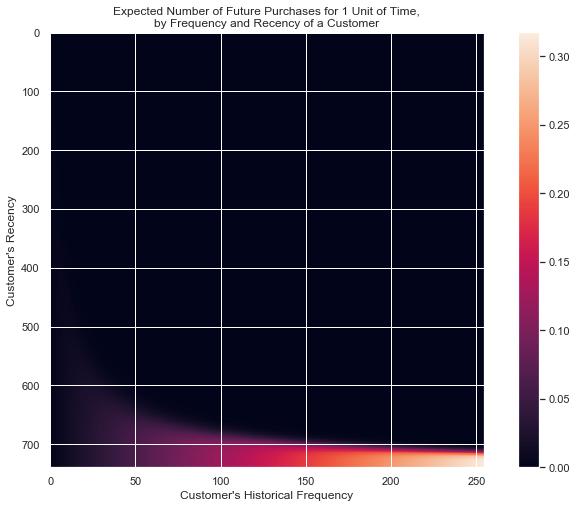

In [64]:
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

#### probability of still being alive

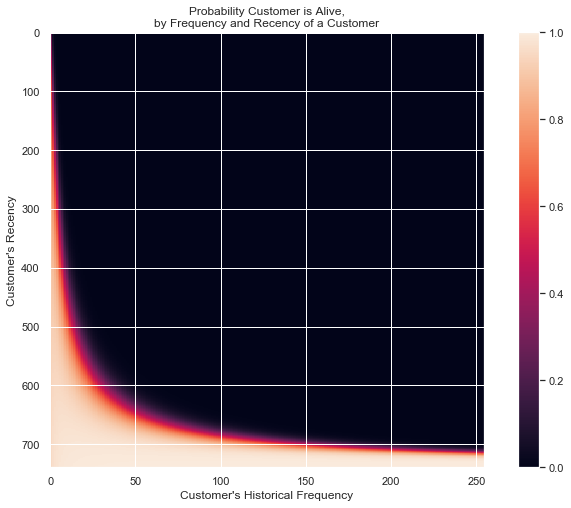

In [65]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

##### Ranking customers from best to worst

In [66]:
t = 90
summary_data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_data['frequency'],
                                                                                              summary_data['recency'], 
                                                                                              summary_data['T'])
summary_data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14606.0,180.0,735.0,737.0,165.202056,20.175202
17841.0,192.0,736.0,738.0,354.268437,21.489242
15311.0,195.0,738.0,739.0,585.350769,21.801279
12748.0,201.0,735.0,736.0,265.344726,22.553984
14911.0,254.0,737.0,739.0,1144.437717,28.372243


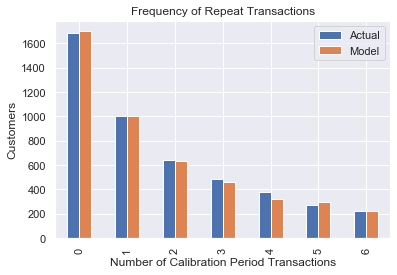

In [67]:
plot_period_transactions(bgf)

#### Spliting calibration and holdout period

In [68]:
summary_cal_holdout = calibration_and_holdout_data(data, 
                                                   customer_id_col = 'CustomerID', 
                                                   datetime_col = 'InvoiceDate',
                                                   monetary_value_col='total_price',
                                                   freq = 'D', #days
                                        calibration_period_end=calibration_period_ends,
                                        observation_period_end= observation_period_end )

In [69]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346.0,7.0,400.0,634.0,11066.637143,0.0,0.000000,92
12347.0,5.0,275.0,313.0,558.172000,2.0,26.192069,92
12348.0,3.0,190.0,347.0,495.746667,1.0,103.333333,92
12349.0,2.0,182.0,498.0,801.310000,1.0,24.076027,92
12350.0,0.0,0.0,219.0,0.000000,0.0,0.000000,92


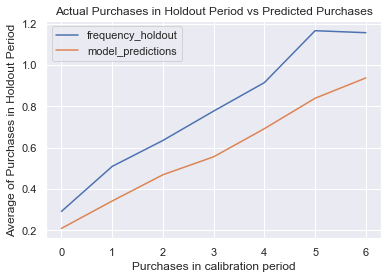

In [70]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

##### Customer Predictions

In [71]:
t = 10 #predict purchases in 10 periods
individual = summary_data.iloc[20]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
# 0.0576511

0.009113338051771341

##### Customer Probability Histories

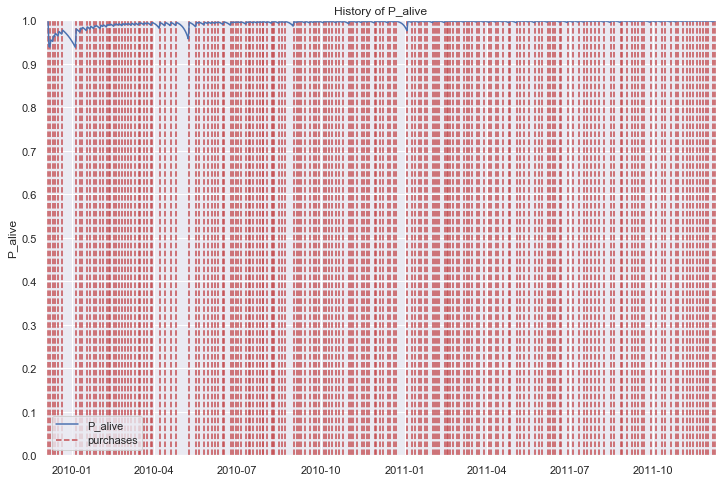

In [72]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
id = 14606
days_since_birth = 365
sp_trans = data.loc[data['CustomerID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')

#### The Gamma-Gamma model

In [73]:
returning_customers_summary = summary_data[summary_data['frequency']>0]

returning_customers_summary.head()

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
12346.0,7.0,400.0,726.0,11066.637143,0.489988
12347.0,7.0,402.0,405.0,615.714286,1.439481
12348.0,4.0,363.0,439.0,449.310000,0.794114
12349.0,3.0,571.0,590.0,1120.056667,0.488029
12352.0,8.0,356.0,393.0,338.261250,1.652380


In [74]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.022357
frequency,0.022357,1.000000


In [75]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 4189 subjects, p: 2.17, q: 3.48, v: 457.44>


In [76]:
ggf.conditional_expected_average_profit(
        summary_data['frequency'],
        summary_data['monetary_value']
    ).head(10)

CustomerID
12346.0    9569.972160
12347.0     585.497376
12348.0     438.436268
12349.0     921.561471
12350.0     400.367697
12351.0     400.367697
12352.0     346.022681
12353.0     255.041374
12354.0     400.367697
12355.0     427.920162
dtype: float64

In [77]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_data['frequency'],
        summary_data['monetary_value']
    ).mean(),
    summary_data[summary_data['frequency']>0]['monetary_value'].mean()))

Expected conditional average profit: 419.8422353996619, Average profit: 439.19578167489817








references : 


https://guillaume-martin.github.io/rfm-segmentation-with-python.html

https://www.kaggle.com/mahmoudelfahl/cohort-analysis-customer-segmentation-with-rfm